## Setting up the Project by downloading the required libraries and datasets

In [27]:
!pip install opendatasets --upgrade --quiet

In [28]:
import opendatasets as od

In [29]:
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [30]:
data_file = '/content/us-accidents/US_Accidents_Dec21_updated.csv'

# Data Preparation and Cleaning
1. Loading the data using Pandas
2. Getting an overview of data and columns
3. Finding out any missing value or error and fixing them(Cleaning)

In [129]:
import pandas as pd
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap

In [32]:
data = pd.read_csv(data_file)

In [205]:
data.tail(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [35]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [36]:
len(data.columns)

47

In [37]:
data.dtypes.value_counts()

object     20
float64    13
bool       13
int64       1
dtype: int64

In [38]:
data.isna().sum().sort_values(ascending =False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [39]:
missing_percentage = data.isnull().sum().sort_values(ascending = False)/len(data)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

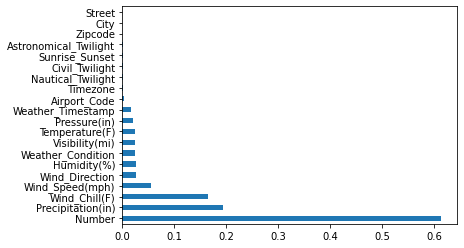

In [40]:
missing_percentage[missing_percentage > 0].plot(kind = 'barh')

In [41]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##EDA and ANalysis By using different combinations
##Columns to be used in EDA
1. Severity

2. City

4. temprature

5. Humidity

6. Weather Condition

7. Sunset_Sunrise

###City


In [42]:
data['City']

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [43]:
data['City'].unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [44]:
len(data['City'].unique())

11682

In [45]:
most_accident_cities = data['City'].value_counts()

In [46]:
most_accident_cities

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [47]:
most_accident_cities[:10]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

In [206]:
data.City[data['City']=='New York'].count()

7068

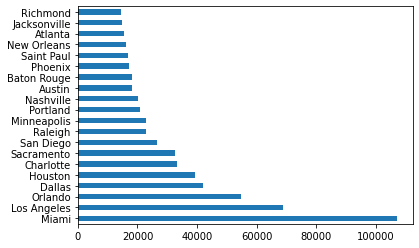

In [49]:
most_accident_cities[:20].plot(kind = 'barh')

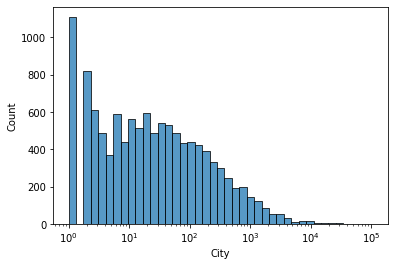

In [72]:
sns.histplot(most_accident_cities, log_scale = True)

In [62]:
High_accident_cities = most_accident_cities[most_accident_cities > 2000]
High_accident_cities

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Decatur          2041
Irving           2035
Azusa            2031
Middletown       2030
Vallejo          2028
Name: City, Length: 218, dtype: int64

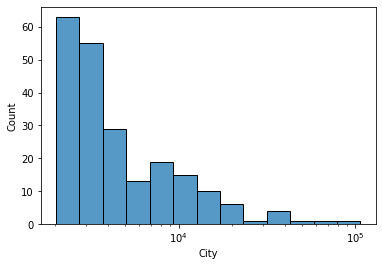

In [71]:
sns.histplot(High_accident_cities, log_scale = True)

In [63]:
len(High_accident_cities)/len(most_accident_cities)

0.01866278572040065

In [51]:
low_accident_cities = most_accident_cities[most_accident_cities<2000]
low_accident_cities

Centreville                     1976
Napa                            1973
Lynwood                         1971
Aurora                          1966
Providence                      1965
                                ... 
Ridgedale                          1
Sekiu                              1
Wooldridge                         1
Bullock                            1
American Fork-Pleasant Grove       1
Name: City, Length: 11463, dtype: int64

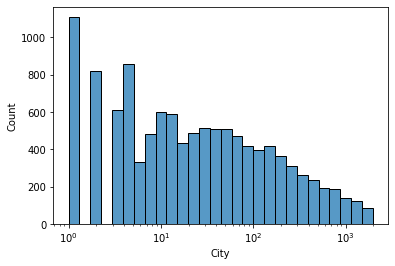

In [75]:
sns.histplot(low_accident_cities, log_scale = True)

In [78]:
most_accident_cities[most_accident_cities == 3]

Remus                  3
Higden                 3
Marcus                 3
Knox City              3
Agency                 3
                      ..
Newtonville            3
Kinsman                3
Red Boiling Springs    3
Horatio                3
Loda                   3
Name: City, Length: 610, dtype: int64

###Start Time


In [82]:
data['Start_Time'].head()
# df.Start_Time.head()

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
3    2016-02-08 06:51:45
4    2016-02-08 07:53:43
Name: Start_Time, dtype: object

In [83]:
data.Start_Time = pd.to_datetime(data.Start_Time)

In [84]:
data.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [86]:
data.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

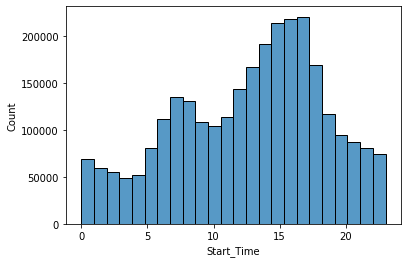

In [88]:
sns.histplot(data.Start_Time.dt.hour, bins =24 )

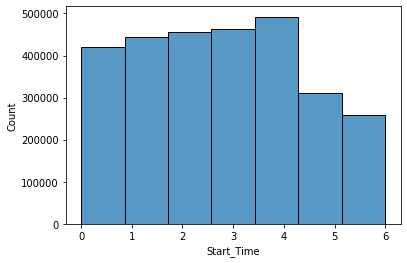

In [89]:
sns.histplot(data.Start_Time.dt.dayofweek, bins = 7)

In [90]:
sunday = data.Start_Time[data.Start_Time.dt.dayofweek == 6]

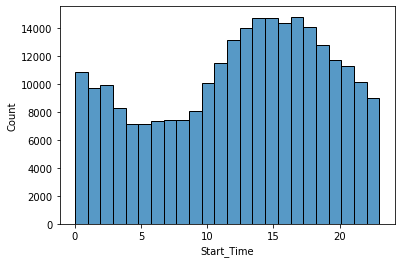

In [93]:
sns.histplot(sunday.dt.hour, bins = 24)

In [95]:
saturday = data.Start_Time[data.Start_Time.dt.dayofweek == 5]

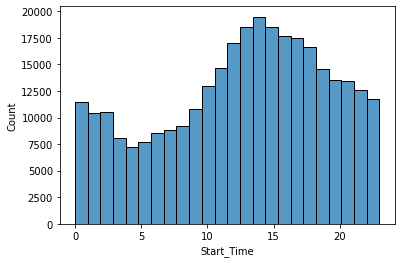

In [120]:
sns.histplot(saturday.dt.hour, bins = 24)

In [98]:
month = data.Start_Time[data.Start_Time.dt.month]

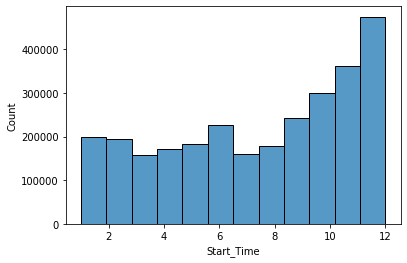

In [107]:
sns.histplot(data.Start_Time.dt.month, bins =12)

In [126]:
year = data.Start_Time[data.Start_Time.dt.year == 2019]

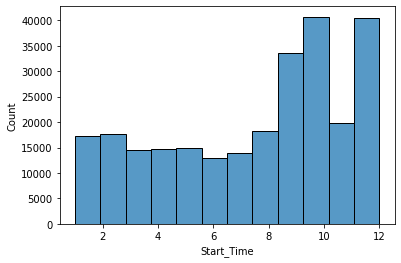

In [127]:
sns.histplot(year.dt.month, bins = 12)

In [147]:
# map = folium.Map(location = [18.457175, 73.846806],zoom_start = 18)
# folium.Marker([18.457175, 73.846806], popup = 'My Location',icon = folium.Icon(color = 'green')).add_to(map)

In [167]:
sample_df = data.sample(int(0.001*len(data)))
pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [168]:
map = folium.Map()
HeatMap(pairs).add_to(map)


In [169]:
map

###Temprature

In [175]:
data['Temperature(F)']

0          42.1
1          36.9
2          36.0
3          39.0
4          37.0
           ... 
2845337    86.0
2845338    70.0
2845339    73.0
2845340    71.0
2845341    79.0
Name: Temperature(F), Length: 2845342, dtype: float64

In [178]:
data.rename(columns = {'Temperature(F)': 'Temprature'}, inplace = True)

In [184]:
low_temp = data.Temprature[data.Temprature <0]

In [185]:
low_temp

13011      -0.4
13021      -0.9
13030      -2.0
13057      -0.9
13058      -0.9
           ... 
2724816    -2.9
2724833    -0.9
2724835    -6.0
2771896   -17.0
2772393   -22.0
Name: Temprature, Length: 6444, dtype: float64

In [186]:
high_temp = data.Temprature[data.Temprature > 100]

In [187]:
high_temp

4397       102.9
4450       102.0
4500       100.9
4504       100.9
4507       100.9
           ...  
2845144    101.0
2845146    102.0
2845150    102.0
2845152    103.0
2845153    102.0
Name: Temprature, Length: 9727, dtype: float64

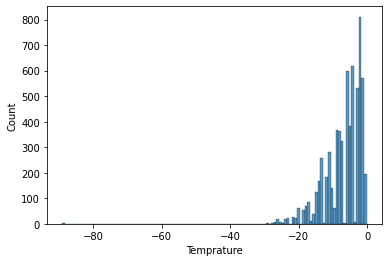

In [195]:
sns.histplot(low_temp)

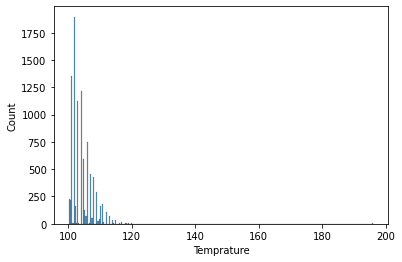

In [196]:
sns.histplot(high_temp)

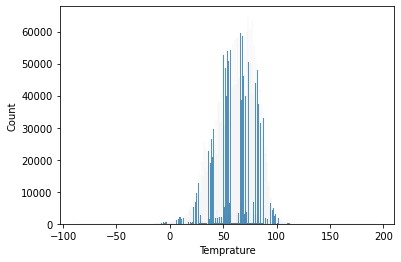

In [199]:
sns.histplot(data.Temprature)

#Insights
1. New york Being the most populated country has been ranked at 51th position in number of accidents.

2. less than 1% of Cities have more than 2 thousand accidents yearly 

3. 1110 Cities have only one Accident.
4. Most number of accidents occur During Evening time between 3pm to 6pm
5. Friday is the day of week which recorded most number of accidents.
6. Number of Accidents was low on weekend days as compared to week days.
7. As the number of accidents on weekends was low however the pattern in number of accidents during the hours of the day was same.
8. Number of accidents increased at the end of year as compared to early time of year with December being the month of year with highest number of Accidents and March with least accidents.
9. Most number of Acccidents occured when the temprature was between 40F anf 70F.